# Model Selection Process for Regression

## Combined Cycle Power Plan Data Set

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

Dataset Source: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant


### Import Python libraries

In [21]:
# import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import sklearn model libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# import sklearn preprocessing & metrics libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

### Import Dataset, Create training and test sets

In [22]:
# import power plant dataset
df = pd.read_csv('datasets/power_plant.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [23]:
# split data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# print first 5 rows of X and y
print(f'First 5 rows of X: {X[:5]}')
print(f'First 5 rows of y: {y[:5]}')

First 5 rows of X: [[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 [  20.86   57.32 1010.24   76.64]
 [  10.82   37.5  1009.23   96.62]]
First 5 rows of y: [463.26 444.37 488.56 446.48 473.9 ]


In [24]:
# create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# print training and test set sizes
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# print first 5 rows of X_train and y_train
print(f'First 5 rows of X_train: {X_train[:5]}')
print(f'First 5 rows of y_train: {y_train[:5]}')

# print first 5 rows of X_test and y_test
print(f'First 5 rows of X_test: {X_test[:5]}')
print(f'First 5 rows of y_test: {y_test[:5]}')


Training set size: 7654
Test set size: 1914
First 5 rows of X_train: [[  11.22   43.13 1017.24   80.9 ]
 [  13.67   54.3  1015.92   75.42]
 [  32.84   77.95 1014.68   45.8 ]
 [  31.91   67.83 1008.76   53.22]
 [  10.37   37.5  1013.19   79.25]]
First 5 rows of y_train: [473.93 467.87 431.97 425.28 473.1 ]
First 5 rows of X_test: [[  28.66   77.95 1009.56   69.07]
 [  17.48   49.39 1021.51   84.53]
 [  14.86   43.14 1019.21   99.14]
 [  22.46   58.33 1013.21   68.68]
 [  18.38   55.28 1020.22   68.33]]
First 5 rows of y_test: [431.23 460.01 461.14 445.9  451.29]


### Multiple Linear Regression Model

In [25]:
#feature scale X_train and X_test
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_MLR = sc_X.fit_transform(X_train)
y_train_MLR = sc_y.fit_transform(y_train.reshape(-1, 1))

# create and fit multiple linear regression model
mlr = LinearRegression()
mlr.fit(X_train_MLR, y_train_MLR)

X_test_MLR = sc_X.transform(X_test)

# predict y_test using X_test
y_pred_MLR = mlr.predict(X_test_MLR)

# get inverse of y_pred_MLR
y_pred_MLR = sc_y.inverse_transform(y_pred_MLR)

# evaluate multiple linear regression model
r2_MLR = r2_score(y_test, y_pred_MLR)
print(f'Multiple Linear Regression R2 Score: {r2_MLR}')


Multiple Linear Regression R2 Score: 0.9325315554761302


### Polynomial Regression Model

In [26]:
# loop trhough different polynomial degrees
num_model = 5
r2_PR = np.zeros(num_model)
for i in range(2, 6):
    # create polynomial features
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # create and fit polynomial regression model
    pr = LinearRegression()
    pr.fit(X_train_poly, y_train)

    # predict y_test using X_test
    y_pred_PR = pr.predict(X_test_poly)

    # evaluate polynomial regression model
    r2_PR[i - 2] = r2_score(y_test, y_pred_PR)

    print(f'Polynomial Regression R2 Score (degree {i}): {r2_PR[i - 2]}')

# print best polynomial regression model
print(f'Best Polynomial Regression R2 Score: {np.max(r2_PR)}')

# print best polynomial degree
print(f'Best Polynomial Degree: {np.argmax(r2_PR) + 2}')

# save best polynomial r2 score
r2_PR_best = np.max(r2_PR)

Polynomial Regression R2 Score (degree 2): 0.9421687659462404
Polynomial Regression R2 Score (degree 3): 0.944367864805792
Polynomial Regression R2 Score (degree 4): 0.9458193026155043
Polynomial Regression R2 Score (degree 5): 0.9447835528780982
Best Polynomial Regression R2 Score: 0.9458193026155043
Best Polynomial Degree: 4


### Support Vector Regression Model

In [27]:
# create feature scaler
sc_X_SVR = StandardScaler()
sc_y_SVR = StandardScaler()

# feature scale X_train and X_test
X_train_SVR = sc_X_SVR.fit_transform(X_train)
X_test_SVR = sc_X_SVR.transform(X_test)

y_train_SVR = sc_y_SVR.fit_transform(y_train.reshape(-1, 1))

# create support vector regression model
svr = SVR(kernel='rbf')
svr.fit(X_train_SVR, y_train_SVR.ravel())

# predict y_test using X_test
y_pred_SVR = svr.predict(X_test_SVR)

# get inverse of y_pred_SVR
y_pred_SVR = sc_y_SVR.inverse_transform(y_pred_SVR.reshape(-1, 1))

# evaluate support vector regression model
r2_SVR = r2_score(y_test, y_pred_SVR)
print(f'Support Vector Regression R2 Score: {r2_SVR}')


Support Vector Regression R2 Score: 0.9480784049986258


### Decision Tree Regression Model

In [28]:
# create decision tree regression model
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

# predict y_test using X_test
y_pred_DTR = dtr.predict(X_test)

# evaluate decision tree regression model
r2_DTR = r2_score(y_test, y_pred_DTR)
print(f'Decision Tree Regression R2 Score: {r2_DTR}')


Decision Tree Regression R2 Score: 0.922905874177941


### Random Forest Regression Model

In [31]:
# calculate number of trees using log base 2
num_trees_log = int(np.log2(X_train.shape[0]))

# calculate number of features using sqrt
num_trees_sqrt = int(np.sqrt(X_train.shape[0]))

num_trees = [num_trees_log, num_trees_sqrt]

r2_RFR = np.zeros(len(num_trees))
# create random forest regression models
for index, i in enumerate(num_trees):
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    rfr.fit(X_train, y_train)

    # predict y_test using X_test
    y_pred_RFR = rfr.predict(X_test)

    # evaluate random forest regression model
    r2_RFR[index] = r2_score(y_test, y_pred_RFR)
    print(f'Random Forest Regression R2 Score (n_estimators={i}): {r2_RFR[index]}')

# print best random forest regression model
print(f'Best Random Forest Regression R2 Score: {np.max(r2_RFR)}')

# save best random forest r2 score
r2_RFR_best = np.max(r2_RFR)


Random Forest Regression R2 Score (n_estimators=12): 0.9628875097054848
Random Forest Regression R2 Score (n_estimators=87): 0.9650271144666863
Best Random Forest Regression R2 Score: 0.9650271144666863


### Model Comparison

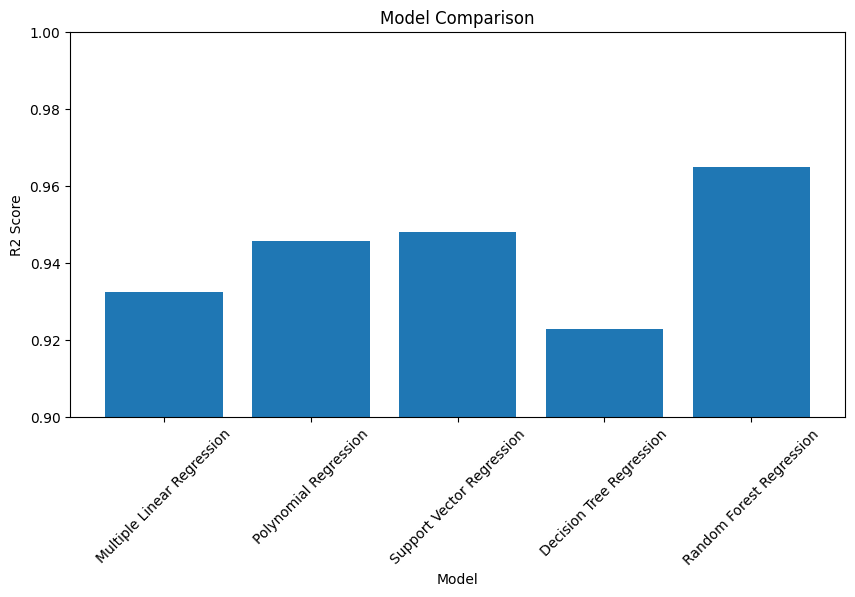

The best model is the Random Forest Regression model with an R2 score of 0.9650271144666863.


In [37]:
# create dictionary of models
models = {'Multiple Linear Regression': r2_MLR,
            'Polynomial Regression': r2_PR_best,
            'Support Vector Regression': r2_SVR,
            'Decision Tree Regression': r2_DTR,
            'Random Forest Regression': r2_RFR_best}

# create dataframe of models and r2 scores
df_models = pd.DataFrame(models.items(), columns=['Model', 'R2 Score'])

# plot bar chart of models and r2 scores
plt.figure(figsize=(10, 5))
plt.bar(df_models['Model'], df_models['R2 Score'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.xticks(rotation=45)
# scale y-axis to zoom in on differences
plt.ylim(0.9, 1)
plt.show()

# print conclusion
print(f'The best model is the Random Forest Regression model with an R2 score of {r2_RFR_best}.')